In [1]:
!pip install -U scikit-fuzzy

In [2]:

import numpy as np
import skfuzzy as fuzz
import tensorflow as tf
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


In [3]:

# Generating Example Data randomly selected temperature
temperature = np.random.randint(0, 101, 100)
desired_temperature = np.random.randint(0, 101, 100)


In [4]:
temperature.view()

array([62, 95, 64, 79, 29, 40, 28, 39, 95, 51, 97, 91, 91, 97,  6, 37, 12,
        9, 85, 38, 89, 60, 80, 14, 72, 59, 91, 72, 50,  7, 30,  7, 20, 81,
       82, 32, 79, 65, 24, 68, 82, 22, 51, 90, 98, 49, 73, 30, 63, 83, 39,
       92, 66, 50, 57, 86, 63,  9, 25, 24, 14, 49, 17, 86, 83, 41, 28, 79,
       47, 39, 17, 16, 70, 66, 82, 32, 75, 73, 59, 56, 25, 72,  4,  6, 27,
       94, 11, 80, 61, 48, 69, 48, 55, 63,  3, 25, 69,  1, 74, 93])

In [5]:
desired_temperature.view()

array([  1,  66,  43,  69,  45,  73,  66,  51,  20,  43,  36,  90,  51,
        68,  61,  46,  64,  34,  54,  98,  28,  58,  58,  83,  27,  53,
        99,  97,   7,  78,  86,  72,  12,  40,  95,  38,  60,  27,  96,
        79,  81,  11,  13,  55,  45,  36,   9,  42,  79, 100,  27,  12,
        95,  57,  94,  17,  65,  78,  88,  65,   3,  12,  17,   3,  76,
        44,  46,  81,  88,  26,  29,  53,  72, 100,  75,   7,  83,  95,
        58,  86,  86,  19,  37,  93,  33,  24,  35,  40,  33,  49,  36,
        32,   6,  82,   7,  48,   2,  30, 100,  51])

In [6]:

# Defining Fuzzy Variables
temperature_input = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature (°C)')
desired_temp_input = ctrl.Antecedent(np.arange(0, 101, 1), 'desired_temperature (°C)')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')


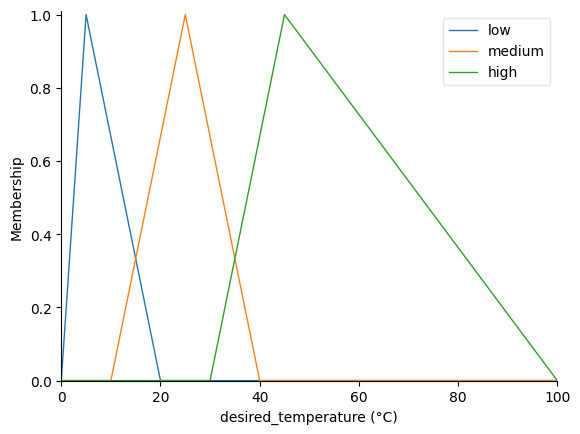

In [17]:
desired_temp_input.view()

In [8]:

# Define membership functions

# Temperature input
temperature_input['low'] = fuzz.trimf(temperature_input.universe, [0, 5, 20])
temperature_input['medium'] = fuzz.trimf(temperature_input.universe, [10, 25, 40])
temperature_input['high'] = fuzz.trimf(temperature_input.universe, [30, 45, 100])

# Desired temperature input
desired_temp_input['low'] = fuzz.trimf(desired_temp_input.universe, [0, 5, 20])
desired_temp_input['medium'] = fuzz.trimf(desired_temp_input.universe, [10, 25, 40])
desired_temp_input['high'] = fuzz.trimf(desired_temp_input.universe, [30, 45, 100])

# Fan speed output
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])


# Defining Fuzzy Rules
rule1 = ctrl.Rule(temperature_input['low'] | desired_temp_input['low'], fan_speed['high'])
rule2 = ctrl.Rule(temperature_input['medium'] & desired_temp_input['medium'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature_input['high'] | desired_temp_input['high'], fan_speed['low'])

# Creating Fuzzy Control System
fan_speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
fan_speed = ctrl.ControlSystemSimulation(fan_speed_ctrl)


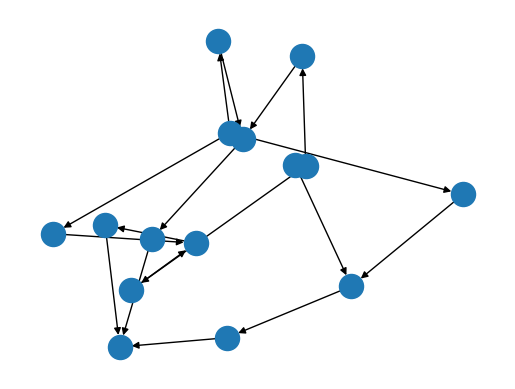

In [9]:

#View membership functions
fan_speed_ctrl.view()


In [10]:

# Generate some example data for prediction
test_data = np.column_stack((temperature, desired_temperature))

# Predicting using the Fuzzy Model
predicted_fan_speed = []
for data in test_data:
  fan_speed.input['temperature (°C)'] = data[0]
  fan_speed.input['desired_temperature (°C)'] = data[1]
  # Simulate the fuzzy system
  fan_speed.compute()
  # the actual output value
  predicted_fan_speed.append(fan_speed.output['fan_speed'])

print(predicted_fan_speed)


[34.8299465240642, 18.425039872408295, 16.928104575163395, 18.876102800153426, 16.666666666666664, 18.055555555555554, 18.425039872408295, 16.845504222553398, 23.881673881673898, 16.845504222553398, 20.416666666666657, 22.80303030303032, 16.845504222553398, 18.721833721833715, 51.88589207791515, 16.672077922077914, 47.64552219491257, 62.275470358537405, 17.05018939393939, 19.141414141414142, 22.592592592592588, 17.41978609625668, 17.41978609625668, 53.41544532616477, 19.360679970436063, 16.97450697450697, 23.01530153015299, 19.360679970436063, 49.77269954903418, 58.353120243531166, 21.972853535353536, 55.29996090000306, 67.50378028227352, 18.055555555555554, 21.175889328063214, 32.4962197177264, 17.640692640692638, 18.282828282828277, 24.10234419668382, 18.721833721833715, 20.98235098235097, 73.92507026248231, 43.47260714601489, 17.13286713286713, 16.666666666666664, 16.748844375963017, 54.50383548628078, 17.222222222222218, 18.011623080116234, 21.37178233952428, 26.074929737517643, 66

In [11]:
print(fan_speed.output)

OrderedDict([('fan_speed', 16.845504222553398)])


In [13]:

# Generate data randomly selected temperature
temperature = np.random.randint(0, 101, 100)
desired_temperature = np.random.randint(0, 101, 100)

# Combine Fuzzy System Data for ANN
predicted_fuzzy_speed = []
for i in range(len(temperature)):
  # Simulate fuzzy system
  fan_speed.input['temperature (°C)'] = temperature[i]
  fan_speed.input['desired_temperature (°C)'] = desired_temperature[i]
  fan_speed.compute()

  # Access the fuzzy output
  predicted_fuzzy_speed.append(fan_speed.output['fan_speed'])

# Prepare data for ANN
combined_data = np.column_stack((temperature, desired_temperature, predicted_fuzzy_speed))

# Define and Train ANN Model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])

# Mean squared error loss
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(combined_data, np.random.rand(100), epochs=100)

# Generate some example data for prediction
test_data = np.column_stack((temperature, desired_temperature, np.zeros(len(temperature))))

# Predict fan speed (fuzzy system + ANN)
predicted_fan_speed = []
for i in range(len(test_data)):
  # Simulate fuzzy system
  fan_speed.input['temperature (°C)'] = test_data[i][0]
  fan_speed.input['desired_temperature (°C)'] = test_data[i][1]
  fan_speed.compute()
  test_data[i][2] = fan_speed.output['fan_speed']

  # Predict using the ANN model
  predicted_fan_speed.append(model.predict(np.array([test_data[i]]))[0][0])

# Print the predicted fan speed
print(predicted_fan_speed)


Epoch 1/100
4/4 [==============================] - 2s 16ms/step - loss: 25.2840
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 12.6721
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 8.5734
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 2.0820
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 6.2187
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 1.4825
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 1.4179
Epoch 8/100
4/4 [==============================] - 0s 23ms/step - loss: 1.3796
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6334
Epoch 10/100
4/4 [==============================] - 0s 13ms/step - loss: 1.1022
Epoch 11/100
4/4 [==============================] - 0s 15ms/step - loss: 0.3883
Epoch 12/100
4/4 [==============================] - 0s 14ms/step - loss: 0.4875
Epoch 13/100
4/4 [==============================] 

In [14]:

# Print the predicted fan speed
print(predicted_fan_speed)


[0.35777944, 0.688528, 0.54441875, 0.5876457, 0.5547177, 0.80595106, 0.70375246, 0.48615962, 0.62241715, 0.51234907, 0.51761025, 0.60475534, 0.686768, 0.6817402, 0.819838, 0.56318873, 0.7294907, 0.6163459, 0.43667734, 0.35908836, 0.8886799, 0.5529627, 0.82596374, 0.5688347, 0.78528017, 0.6342663, 0.6870455, 0.71284, 0.34169564, 0.82553, 0.54620594, 0.6800141, 0.64881796, 0.5489096, 0.7474708, 0.8131432, 0.6421637, 0.7559623, 0.9536194, 0.6270017, 0.5910692, 0.65014404, 0.80561155, 0.69975895, 0.67669386, 0.6192345, 0.45277017, 0.61158603, 0.45394868, 0.6410145, 0.53922266, 0.7655287, 0.6073274, 0.77217954, 0.5920014, 0.6578359, 0.61244386, 0.7797633, 0.34379083, 0.7582516, 0.62966675, 0.5448062, 0.56994766, 0.52402633, 0.57772154, 0.5049738, 0.9675731, 0.587933, 0.6237487, 0.56701344, 0.6955876, 0.9184932, 0.6912417, 0.99910206, 0.49739546, 0.6156387, 0.90719694, 0.60098547, 0.8497562, 0.07323022, 0.05983348, 0.4984867, 1.0499339, 0.68031543, 0.5983812, 0.6064519, 0.36900657, 0.9195456

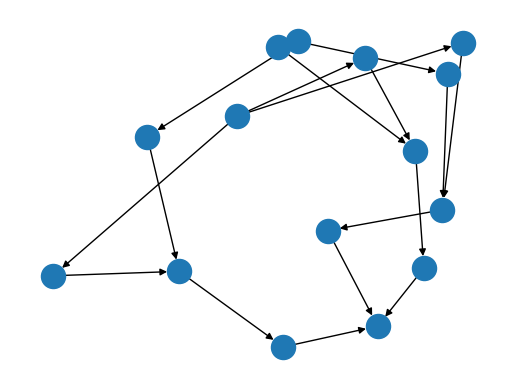

In [15]:

#View membership functions after ANN
fan_speed_ctrl.view()


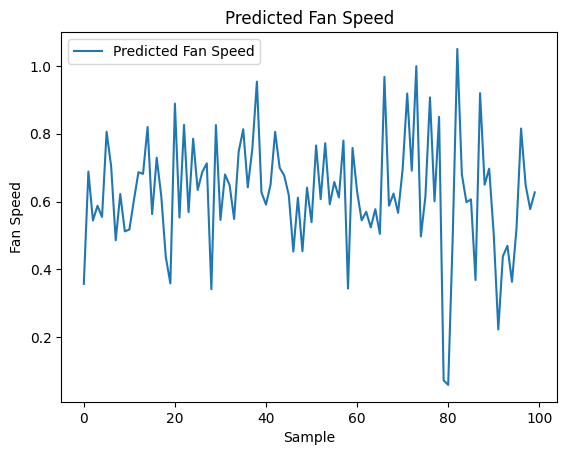

In [16]:

# Plot predicted fan speed
plt.figure()
plt.plot(predicted_fan_speed, label='Predicted Fan Speed')
plt.xlabel('Sample')
plt.ylabel('Fan Speed')
plt.title('Predicted Fan Speed')
plt.legend()
plt.show()
